# Ecuación Black-Scholes


La ecuación Black-Scholes es:

$$
\frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + rS \frac{\partial V}{\partial S} - rV = 0
$$

Estamos trabajando con un modelo matemático que se usa para calcular el precio teórico de las opciones financieras. Se basa en la hipótesis de que los mercados financieros son eficietes y que el precio de los activos subyacentes siguen un movimiento Browniano Geométrico. La fórmula Black-Scholes usa un ecuación diferencial parcial para determinar el valor justo de una opcción Europea Call o Put.

- $V$ representa el precio de la opción en función del tiempo (t) y del precio del activo subyacente (S.
- $\sigma$ es la volatilidad del rendimiento del activo subyacente, indicando el grado de variabilidad en su precio.
- $r$ es la tasa de interés anual libre de riesgo, con composición continua.

Conocemos el momento en el que expira la opción $T$, haciendo el cambio de variable $t = T-t'$ obtenemos un problema con condición inicial:

$$

\frac{\partial V}{\partial t} - \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} - rS \frac{\partial V}{\partial S} + rV = 0
$$

Con condición inicial $V(S, 0) = max\{S-K, 0\}$, es decir, se trata de una **opción Call Europea**. Las condiciones de contorno son:

- $V(0, t) = 0 \quad \forall t$

- $V_S(S_{max}, t) = 1 \quad \forall t$.





## Método Euler Explícito

Partimoss de la ecuación parabólica

$$
\frac{\partial V}{\partial t} = \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + rS \frac{\partial V}{\partial S} - rV
$$

Sea $k = \Delta t$, $h = \Delta S$.


$$
\frac{\partial V}{\partial t} = \frac{V_j^{n+1} - V_j^n}{k}
$$

$$
\frac{\partial^2 V}{\partial S^2} = \frac{1}{h^2}(V_{j-1}^n - 2V_j^n + V_{j+1}^n)
$$

$$
\frac{\partial V}{\partial S} = \frac{1}{2h}(V_{j+1}^n - V_{j-1}^n)
$$

Por simplicidad, denotamos:

$$
\lambda (S) = \frac{\sigma^2 S^2}{2}
$$

$$
\mu(S) = rS
$$

$$
\eta(S) = -r
$$

**Nota:** Aunqe $\eta$ sea una constante, mantendremos esta notación para realizar un desarrollo generalizable a ecuaciones con estructura similar.

Tenemos entonces:

$$
\begin{aligned}
\frac{V_j^{n+1} - V_j^n}{k} &= \frac{\lambda_j}{h^2}(V_{j-1}^n - 2V_j^n + V_{j+1}^n) + \frac{\mu_j}{2h}(V_{j+1}^n - V_{j-1}^n) + \eta_j V_j^n \\
\Leftrightarrow V_j^{n+1} &= V_j^n + \frac{k \lambda_j}{h^2}(V_{j-1}^n - 2V_j^n + V_{j+1}^n) + \frac{k \mu_j}{2h}(V_{j+1}^n - V_{j-1}^n) + k \eta_j V_j^n = \\
&= (\frac{k \lambda_j}{h^2} - \frac{k \mu_j}{2h})V_{j-1}^n + (1 - \frac{2k \lambda_j}{h^2} + k\eta_j)V_j^n + (\frac{k \lambda_j}{h^2} + \frac{k \mu_j}{2h})V_{j+1}^n 
\end{aligned}
$$


Por las condiciones de contorno:

Como $V(0, t_n) = V_0^n = 0$, tenemos que para $j=1$:

$$
V_1^{n+1} = (\frac{k \lambda_1}{h^2} - \frac{k \mu_1}{2h})*0 + (1 - \frac{2k \lambda_1}{h^2} + k\eta_1)V_1^n + (\frac{k \lambda_1}{h^2} + \frac{k \mu_1}{2h})V_2^n 
$$

Y como $V_S(S_{max}, t) = 1$, usando un esquema centrado introduciendo un **nodo fantasma**:

$$
\frac{V_{m+2}-V_m}{2h} = 1 \Leftrightarrow V_{m+2} = 2h + V_m
$$

Se tiene entonces para $j = m+1$:

$$
\begin{aligned}
V_{m+1}^{n+1} &= (\frac{k \lambda_{m+1}}{h^2} - \frac{k \mu_{m+1}}{2h})V_m^n + (1 - \frac{2k \lambda_{m+1}}{h^2} + k\eta_{m+1})V_{m+1}^n + (\frac{k \lambda_{m+1}}{h^2} + \frac{k \mu_{m+1}}{2h})*(2h + V_m) = \\
&= (\frac{2k}{h^2}\lambda_{m+1})V_m^n + (1 - \frac{2k}{h^2}\lambda_{m+1} + k\eta_{m+1})V_{m+1}^n + (\frac{k}{h^2}\lambda_{m+1} + \frac{k}{2h}\mu_{m+1})
\end{aligned}
$$


In [1]:
using Plots

abstract type Problem end
abstract type Method end

In [2]:

"""
    V(s,t) precio del instrumento dado el valor del
    activo S y el tiempo t.

    S ∈ [0, Sₘₐₓ]
    t > 0

    Ecuación Black-Scholes:
    Vₜ = (σ²S²/2)Vₛₛ + rSVₛ -rV
    Vₜ = λ(s)Vₛₛ + μ(s)Vₛ +η(s)V
    λ(s) = (σ²S²/2)
    μ(s) = rS
    η(s) = -r

    Condiciones iniciales:
    V(S, 0) = max{S-K, 0}
    
    Condiciones de contorno:
    V(0, t) = 0
    Vₛ(Sₘₐₓ, t) = 1     -> Condicion Neumann a la derecha
"""
struct BlackScholesEquation <: Problem
    Sₘₐₓ :: Real
    t_interval :: Vector{Real}
    σ :: Real
    r :: Real
    K :: Real
end

struct ExplicitEuler <: Method
    h :: Float64
    k :: Float64
end

In [3]:

function solve(prob :: BlackScholesEquation, met :: ExplicitEuler)  
        
    σ = prob.σ
    r = prob.r


    λ(S) =  (σ^2 * S^2) / 2
    μ(S) = r*S
    η(S) = -r


    s = [0:h:prob.Sₘₐₓ;]
    t₀, t₊ = prob.t_interval; 
    k = met.k; 
    t =[t₀:k:t₊;]

    len_s = length(s); len_t = length(t)

    V = zeros(len_s, len_t)
    V[:,1] =  @. max(0, s-prob.K) #De j=0:m+1


    for n = 1:len_t-1
        Vfict = 2*h + V[end-1,n] #Vₘ₊₂ = 2h + Vₘ
        Vn = [V[:,n]; Vfict] #j entre 0 y m+2

        for j = 2:len_s #j entre 1 y m+1
            diff1 = (Vn[j+1] - Vn[j-1])
            diff2 = (Vn[j+1] -2*Vn[j] + Vn[j-1])
            V[j, n+1] = Vn[j] + (k*λ(s[j])/(h^2))*diff2 + 
                        (k*μ(s[j])/(2*h))*diff1 + k*η(s[j])*Vn[j]
        end    
    
    end

    return s,t,V

end


solve (generic function with 1 method)

In [4]:

σ = 0.06
r = 0.08
T = 8
K = 3
Sₘₐₓ = 8


problema = BlackScholesEquation(Sₘₐₓ, [0, T], σ, r, K)

h = 1/20
k = h^2 / (σ^2 * Sₘₐₓ^2)


s, t, V = solve(problema, ExplicitEuler(h, k));

Observemos que a tiempo 0, la condición inicial es el Pay-off de la opción Call Europea, ya que se ha hecho un cambio de variable para que el problema sea de valor inicial:

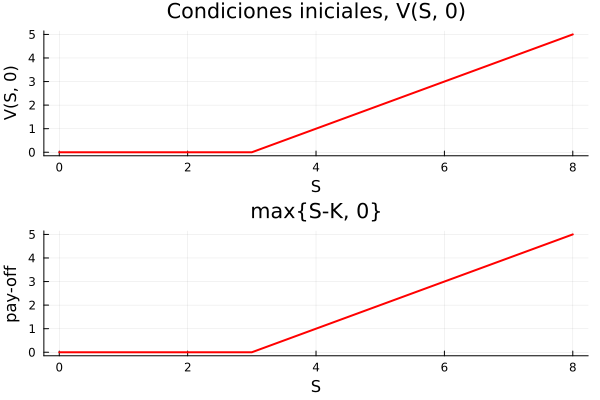

In [5]:
# CONDICION INICIAL
plt1 = plot(s, V[:,1], title = "Condiciones iniciales, V(S, 0)",
     xlabel = "S", ylabel = "V(S, 0)", legend = false, lw=2, lc=:red) #Condiciones iniciales
plt2 = plot(s, s->maximum([s-K; 0]), title = "max{S-K, 0}",
     xlabel = "S", ylabel = "pay-off", legend = false, lw=2, lc=:red)
plot(plt1, plt2, layout=(2,1))

Veamos la evolución de la solución en el tiempo:

┌ Info: Saved animation to /home/javier/Documentos/UNIVERSIDAD/SNUM/TRABAJO_FINAL/black-scholes-Explicit.gif
└ @ Plots /home/javier/.julia/packages/Plots/bMtsB/src/animation.jl:156


Plots.AnimatedGif("/home/javier/Documentos/UNIVERSIDAD/SNUM/TRABAJO_FINAL/black-scholes-Explicit.gif")
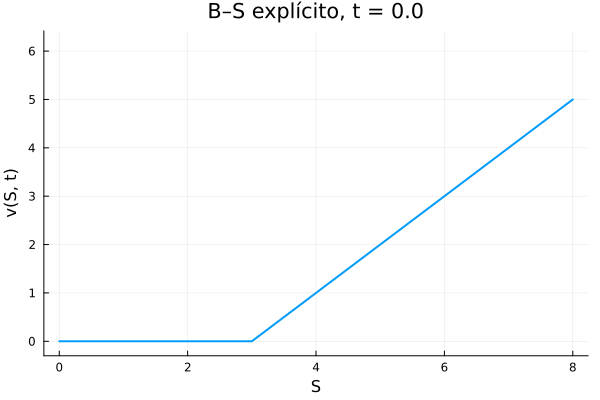

In [21]:
# ANIMACION TEMPORAL
Δt = round(Int, length(t)/60)
anim = @animate for n in 1:Δt:length(t)
    plot(s,V[:,n], lw=2, legend=false,
        xlabel = "S", ylabel = "v(S, t)", yaxis=[-0.3,maximum(V)],    
        title="B–S explícito, t = $(round(t[n], digits=3))", dpi=100)
end
gif(anim,"black-scholes-Explicit.gif")

**¿Qué sentido tiene esto?**

El tiempo t es el tiempo hasta llegar a T. Supongamos que estamos cerca de que finalice el contrato, si el precio de la acción es menor al precio del strike entonces es poco probable de que acabe siendo mayor, por lo que el valor de la opción es menor. Por el contrario, si el precio de la acción fuera por ejemplo el mismo que el del strike, entonces es más probable que la opción se ejecute y el precio de la opción aumenta. Conforme aumente el tiempo para llegar al strike, se espera que el precio tenga más posibilidades de aumentar y por tanto haciendo el valor de la opción mayor para cada $S$ fijo.

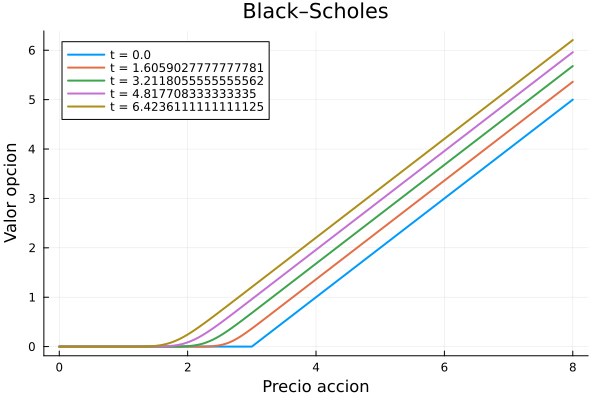

In [7]:
# 5 TIEMPOS DIFERENTES
Δt = round(Int, length(t)/5)
idx = 1:Δt:length(t)
label = reshape(["t = $t" for t in t[idx]],1,length(idx))
plot(s,V[:,idx];label,
    title="Black–Scholes",legend=:topleft,  
    xaxis=("Precio accion"),yaxis=("Valor opcion"), lw=2 )

**Nota:** Este método es condicionalmente inestable, ya que aumentando el paso temporal veamos su comportamiento en t=T:

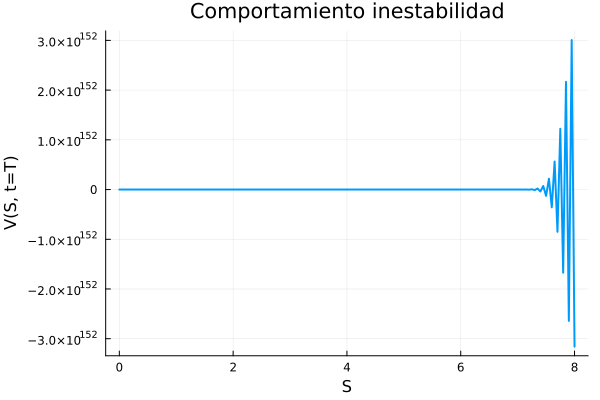

In [8]:
k_inestable = h^2 / (σ^2 * Sₘₐₓ^2) + 0.01
s, t, V_inestable = solve(problema, ExplicitEuler(h, k_inestable));
plot(s, V_inestable[:,end], legend = false, xlabel = "S", ylabel = "V(S, t=T)",
     title = "Comportamiento inestabilidad", lw=2)

## Método Crank-Nicolson

Siguiendo la misma notación que con el esquema explícito. El esquema numérico queda:

$$
\begin{aligned}
\frac{V_j^{n+1}-V_j^n}{k} &= \lambda_j \frac{1}{2h^2}\Bigl[ (V_{j-1}^{n+1} -2V_j^{n+1} + V_{j+1}^{n+1}) + (V_{j-1}^{n} -2V_j^{n} + V_{j+1}^{n}) \Bigr] + \\
                          &+ \mu_j \frac{1}{4h}\Bigl[ (V_{j+1}^{n+1} - V_{j-1}^{n+1} ) + (V_{j+1}^n - V_{j-1}^n)  \Bigr] + \eta_j \frac{1}{2} (V_j^{n+1} + V_j^n)
\end{aligned}
$$

Desarrollando y despejando la solución en el paso $n+1$:

$$
\begin{aligned}
(-\frac{\lambda_j}{2h^2} + \frac{\mu_j}{4h})V_{j-1}^{n+1} &+ (\frac{1}{k} + \frac{\lambda_j}{h^2} - \frac{\eta_j}{2})V_j^{n+1} + (-\frac{\lambda_j}{2h^2} - \frac{\mu_j}{4h})V_{j+1}^{n+1} = \\
= (\frac{\lambda_j}{2h^2} - \frac{\mu_j}{4h})V_{j-1}^{n} &+ (\frac{1}{k} - \frac{\lambda_j}{h^2} + \frac{\eta_j}{2})V_j^{n} + (\frac{\lambda_j}{2h^2} + \frac{\mu_j}{4h})V_{j+1}^{n}
\end{aligned}
$$

Por las condiciones de contorno, $V(0,t_n)=0 = V_0^n$, por tanto para $j=1$:

$$
\begin{aligned}
(-\frac{\lambda_1}{2h^2} + \frac{\mu_1}{4h})&*0 + (\frac{1}{k} + \frac{\lambda_1}{h^2} - \frac{\eta_1}{2})V_1^{n+1} + (-\frac{\lambda_1}{2h^2} - \frac{\mu_1}{4h})V_{2}^{n+1} = \\
= (\frac{\lambda_1}{2h^2} - \frac{\mu_1}{4h})&*0 + (\frac{1}{k} - \frac{\lambda_1}{h^2} + \frac{\eta_1}{2})V_1^{n} + (\frac{\lambda_1}{2h^2} + \frac{\mu_1}{4h})V_{2}^{n}
\end{aligned}
$$

Como $V_S(S_{max}, t) = 1$, de nuevo usando un esquema centrado añadiendo el nodo fantasma se tiene que $V_{m+2} = 2h + V_m$ y por tanto para $j=m+1$:

$$
\begin{aligned}
(-\frac{\lambda_{m+1}}{2h^2} + \frac{\mu_{m+1}}{4h})&V_m^{n+1} + (\frac{1}{k} + \frac{\lambda_{m+1}}{h^2} - \frac{\eta_{m+1}}{2})V_{m+1}^{n+1} + (-\frac{\lambda_{m+1}}{2h^2} - \frac{\mu_{m+1}}{4h})(2h + V_m^{n+1}) = \\
= (\frac{\lambda_{m+1}}{2h^2} - \frac{\mu_{m+1}}{4h})&V_m^n + (\frac{1}{k} - \frac{\lambda_{m+1}}{h^2} + \frac{\eta_{m+1}}{2})V_{m+1}^{n} + (\frac{\lambda_{m+1}}{2h^2} + \frac{\mu_{m+1}}{4h})(2h + V_m^n)
\end{aligned}
$$

Quedando finalmente:

$$
(\frac{-\lambda_{m+1}}{h^2})V_m^{n+1} + (\frac{1}{k} + \frac{\lambda_{m+1}}{h^2} - \frac{\eta_{m+1}}{2})V_{m+1}^{n+1} = (\frac{\lambda_{m+1}}{h^2})V_m^{n} + (\frac{1}{k} - \frac{\lambda_{m+1}}{h^2} + \frac{\eta_{m+1}}{2})V_{m+1}^{n} + (\frac{2 \lambda_{m+1}}{h} + \mu_{m+1})
$$

In [9]:

using LinearAlgebra

"""        
            Mx = y             
    a : diagonal inferior de M      
    b : diagonal de M       
    c : diagonal superior de M   
"""
function tridiag(a, b, c, y)
    m = length(y)

    b̃ = copy(convert(Vector{Float64}, b))
    ỹ = copy(convert(Vector{Float64}, y))

    for i = 2:m
        b̃[i] -= c[i-1]*a[i-1]/b̃[i-1]
        ỹ[i] -= ỹ[i-1]*a[i-1]/b̃[i-1]
    end
    
    x = zeros(m)
    x[m] = ỹ[m]/b̃[m]
    for i = m-1:-1:1
        x[i] = (ỹ[i] - c[i]*x[i+1])/b̃[i]
    end

    return x
end;

struct CrankNicolson <: Method
    h :: Float64
    k :: Float64
end


function solve(prob :: BlackScholesEquation, met :: CrankNicolson)
    σ = prob.σ
    r = prob.r

    λ(S) =  (σ^2 * S^2) / 2
    μ(S) = r*S
    η(S) = -r

    s = [0:h:prob.Sₘₐₓ;]
    t₀, t₊ = prob.t_interval; 
    k = met.k; 
    t =[t₀:k:t₊;]

    len_s = length(s); len_t = length(t)


    V = zeros(len_s, len_t)
    V[:,1] =  @. max(0, s-K) #De j=0:m+1
    a = (-λ.(s[3:end-1]) / (2*h^2) + μ.(s[3:end-1]) / (4*h)) #j=2,...,m
    b = (1/k .+ λ.(s[2:end-1]) / (h^2) - η.(s[2:end-1]) / 2) #j=1,...,m
    c = (-λ.(s[2:end-1]) / (2*h^2) - μ.(s[2:end-1]) / (4h))  #j=1,...,m ya que despues aumentamos una fila
    #Añadimos la ultima fila de la matriz (para j = m+1)
    a = [a; -λ(s[end])/(h^2)]
    b = [b; 1/k + λ(s[end])/(h^2) - η(s[end])/2]

    #Construimos la matriz de la derecha
    d  = [1/k .- λ.(s[2:end])/(h^2) + η.(s[2:end])/2 ; ] #j=1..., m+1 (la ultima fila es continuacion natural)
    dl = [λ.(s[3:end-1])/(2*h^2) - μ.(s[3:end-1])/(4*h) ; λ(s[end])/(h^2)] #j=2,...,m y aumentamos para m+1
    du = λ.(s[2:end-1])/(2*h^2) + μ.(s[2:end-1])/(4*h)  #j=1,...,m

    T = Tridiagonal(dl, d, du)
    for n=1:len_t-1
        y = T*V[2:end, n] #V₀ⁿ = 0 para todo n
        #Modificamos la ultima para la ecuacion de contorno
        y[end] += (2*λ(s[end])/h  +  μ(s[end]))
        V[2:end, n+1] = tridiag(a,b,c,y)
    end

    return s, t, V
end

solve (generic function with 2 methods)

In [10]:
s, t, V_CN = solve(problema, CrankNicolson(h, k));

┌ Info: Saved animation to /home/javier/Documentos/UNIVERSIDAD/SNUM/TRABAJO_FINAL/black-scholes-CrankNicolson.gif
└ @ Plots /home/javier/.julia/packages/Plots/bMtsB/src/animation.jl:156


Plots.AnimatedGif("/home/javier/Documentos/UNIVERSIDAD/SNUM/TRABAJO_FINAL/black-scholes-CrankNicolson.gif")
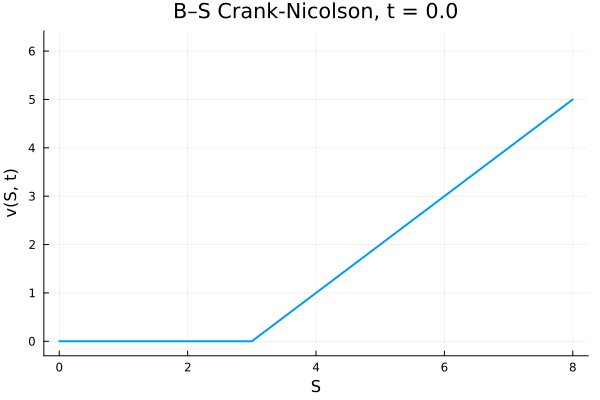

In [11]:
# ANIMACION TEMPORAL
Δt = round(Int, length(t)/60)
anim = @animate for n in 1:Δt:length(t)
    plot(s,V_CN[:,n], lw=2, legend=false,
        xlabel = "S", ylabel = "v(S, t)", yaxis=[-0.3,maximum(V)],    
        title="B–S Crank-Nicolson, t = $(round(t[n], digits=3))", dpi=100)
end
gif(anim,"black-scholes-CrankNicolson.gif")

## Método Strang Splitting

**Primera etapa**:

$$
V_j^{n + 1/2, *} = V_j^{n,*} + \mu_j \frac{k}{4h}(V_{j+1}^{n,*} - V_{j-1}^{n,*}) + \frac{\eta_j}{2}V_j^{n,*}, \quad t \in [n, n+1/2]
$$

Con $V_j^{n,*} = V_j^n$

Para $j=1$:

$$
V^{n+1/2,*} = V_1^{n,*} + \mu_1 \frac{k}{4h}(V_2^{n,*} - 0) + \eta_1 V_1^{n,*}
$$

Para $j=m+1$, como $V_{m+1} = 2h + V_m$:

$$
V_{m+1}^{n+1/2, *} = V_{m+1}^{n,*} + \mu_{m+1}\frac{k}{2} + \eta_{m+1}\frac{k}{2}V_{m+1}^{n,*}
$$

**Segunda etapa**:

$$
V_j^{n+1,**} = V_j^{n,**} + \lambda_j \frac{k}{2h^2}\Bigl[ (V_{j+1}^{n+1,**} - 2V_j^{n+1,**} + V_{j-1}^{n+1,**}) + (V_{j+1}^{n,**} - 2V_j^{n,**} + V_{j-1}^{n,**}) \Bigr] \quad t \in [n, n+1]
$$

Haciendo $v = \frac{k}{2h^2}$, el esquema queda:

$$
-\lambda_j v V_{j-1}^{n+1,**} + (1 + 2\lambda_j v) V_j^{n+1, **} - \lambda_j v V_{j+1}^{n+1, **} = \lambda_j v V_{j-1}^{n,**} + (1 - 2\lambda_j v) V_j^{n, **} - \lambda_j v V_{j+1}^{n, **}
$$

Con $V_j^{n,**} = V_j^{n+1/2,*}$

Para $j=1$:

$$
(1+2\lambda_1 v) V_1^{n+1,**} - \lambda_1 v V_{2}^{n+1,**} = (1-2\lambda_1 v) V_1^{n,**} + \lambda_1 V_{2}^{n,**}
$$

Y para $j=m+1$, teniendo en cuenta que $V_{m+2} = 2h + V_m$ y desarrollando:

$$
-2\lambda_{m+1} v V_m^{n+1,**} + (1 + 2\lambda_{m+1} v) V_{m+1}^{n+1,**} = 2\lambda_{m+1} v V_m^{n, **} + (1 - 2\lambda_{m+1} v) V_{m+1}^{n,**} + 4\lambda_{m+1} v h
$$

**Tercera etapa**:

$$
V_j^{n+1,***} = V_j^{n+1/2,***} + \mu_j \frac{k}{4h}(V_{j+1}^{n+1/2,***} - V_{j-1}^{n+1/2,***}) + \eta_j \frac{k}{2} V_j^{n + 1/2,***} \quad t \in [n+1/2, n+1]
$$

Con $V_j^{n+1/2,***} = V_j^{n+1,**}$

Para $j = 1$:

$$
V_1^{n+1,***} = V_1^{n+1/2,***} + \mu_1 \frac{k}{4h} V_{2}^{n+1/2, ***} + \eta_1 \frac{k}{2} V_1^{n+1/2, ***}
$$

Y para $j=m+1$:

$$
V_{m+1}^{n+1,***} = V_{m+1}^{n+1/2, ***} + \mu_{m+1}\frac{k}{2} + \eta_{m+1} \frac{k}{2} V_{m+1}^{n + 1/2, ***}
$$

In [12]:

struct Strang <: Method
    h :: Float64
    k :: Float64
end

function solve(prob :: Problem, met :: Method)
    σ = prob.σ
    r = prob.r

    λ(S) =  (σ^2 * S^2) / 2
    μ(S) = r*S
    η(S) = -r


    s = [0:h:prob.Sₘₐₓ;]
    t₀, t₊ = prob.t_interval; 
    k = met.k; 
    t =[t₀:k:t₊;]

    len_s = length(s); len_t = length(t)
    V = zeros(len_s, len_t)
    V[:,1] =  @. max(0, s-K) #De j=0:m+1


    #Matrices de la SEGUNDA ETAPA:
    v = k/(2*h^2)
    #Construimos la matriz de la izquierda
    a = -λ.(s[3:end-1]) * v #j=2,...,m, hay que añadir el ultimo elemento
    b = 1 .+  2*λ.(s[2:end])*v #j=1,...,m+1
    c = -λ.(s[2:end-1])*v   #j=1,...,m ya que despues aumentamos una fila
    #Añadimos la ultima fila a de la matriz (para j = m+1)
    a = [a; -2*λ(s[end])*v]

    #Matriz de la derecha
    d = [1 .-  2*λ.(s[2:end])*v;]
    dl = [λ.(s[3:end-1]) * v; 2*λ(s[end])*v]
    du = [λ.(s[2:end-1])*v;]
    Trid = Tridiagonal(dl,d,du)

    V_medio = zeros(len_s)
    V⁺⁺ = zeros(len_s)

    for n = 1:len_t-1
        #PRIMERA ETAPA, medio paso temporal
        
        for j = 2:len_s-1 #j=1,...,m, en j=0 vale 0 por condicion contorno
            V_medio[j] = V[j,n] + μ(s[j])*k/(4*h)*(V[j+1, n] - V[j-1, n]) + (k/2)*η(s[j])*V[j, n]
        end
        #Añadimos j=m+1
        V_medio[len_s] = V[len_s, n] + μ(s[len_s])*k/2 + (k/2)*η(s[len_s])*V[len_s, n]


        #SEGUNDA ETAPA, metodo Crank Nicolson
        #Construios la matriz de la derecha
        y = Trid*V_medio[2:end]
        
        #Modificamos la ultima fila para la ecuacion de contorno
        y[end] += (4*λ(s[end])*v*h)

        
        V⁺⁺[2:end] = tridiag(a,b,c,y)
        

        #TERCERA ETAPA, medio paso temporal
        for j = 2:len_s-1 #j=1,...,m, en j=0 vale 0 por condicion contorno
            V[j, n+1] = V⁺⁺[j] + μ(s[j])*k/(4*h)*(V⁺⁺[j+1] - V⁺⁺[j-1]) + (k/2)*η(s[j])*V⁺⁺[j]
        end
        #Añadimos j=m+1
        V[len_s, n+1] = V⁺⁺[len_s] + μ(s[len_s])*k/2 + (k/2)*η(s[len_s])*V⁺⁺[len_s]
    end

    return s, t, V
end


s, t, V_Strang = solve(problema, Strang(h, k));

┌ Info: Saved animation to /home/javier/Documentos/UNIVERSIDAD/SNUM/TRABAJO_FINAL/black-scholes-CrankNicolson.gif
└ @ Plots /home/javier/.julia/packages/Plots/bMtsB/src/animation.jl:156


Plots.AnimatedGif("/home/javier/Documentos/UNIVERSIDAD/SNUM/TRABAJO_FINAL/black-scholes-CrankNicolson.gif")
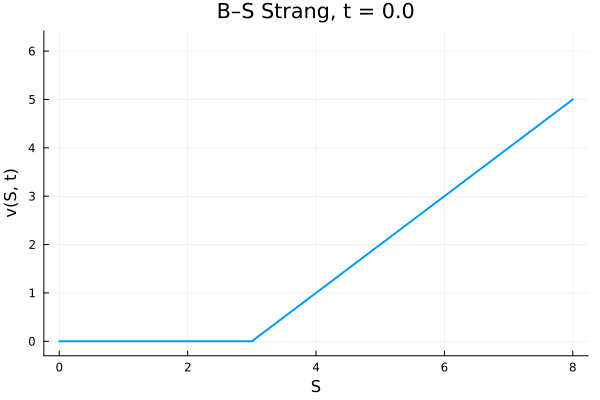

In [13]:
# ANIMACION TEMPORAL
Δt = round(Int, length(t)/60)
anim = @animate for n in 1:Δt:length(t)
    plot(s,V_Strang[:,n], lw=2, legend=false,
        xlabel = "S", ylabel = "v(S, t)", yaxis=[-0.3,maximum(V)],    
        title="B–S Strang, t = $(round(t[n], digits=3))", dpi=100)
end
gif(anim,"black-scholes-CrankNicolson.gif")

## Comparación con la solución exacta

Por teoría financiera, el precio de una opción Call es:

$$
C(S,t) = \Phi(d_1)S - \Phi(d_2) K e^{-r(T-t)}
$$

donde $\Phi \sim N(0,1)$ y

$$
\begin{aligned}
d_1 &= \frac{1}{\sigma \sqrt{T-t}} \Bigl[ log\Bigl(\frac{S}{K}\Bigr) + \Bigl( r + \frac{\sigma^2}{2} \Bigr)(T-t) \Bigr] \\
d_2 &= \frac{1}{\sigma \sqrt{T-t}} \Bigl[ log\Bigl(\frac{S}{K}\Bigr) + \Bigl( r - \frac{\sigma^2}{2} \Bigr)(T-t) \Bigr] 
\end{aligned}
$$

In [14]:
using Distributions

#El precio de una Call Europea es:
function C(S,t, T, σ, r, K)
    d1 =(log(S/K) + (r + (σ^2)/2)*(T-t))/(σ*sqrt(T-t))
    d2 =(log(S/K) + (r - (σ^2)/2)*(T-t))/(σ*sqrt(T-t))
    Φ = Normal(0, 1)
    return cdf(Φ, d1)*S - cdf(Φ, d2)*K*exp(-r*(T-t))
    
end


C (generic function with 1 method)

Vamos a comparar la evolución temporal de los 3 esquemas y la exacta:

┌ Info: Saved animation to /home/javier/Documentos/UNIVERSIDAD/SNUM/TRABAJO_FINAL/black-scholes-todas.gif
└ @ Plots /home/javier/.julia/packages/Plots/bMtsB/src/animation.jl:156


Plots.AnimatedGif("/home/javier/Documentos/UNIVERSIDAD/SNUM/TRABAJO_FINAL/black-scholes-todas.gif")
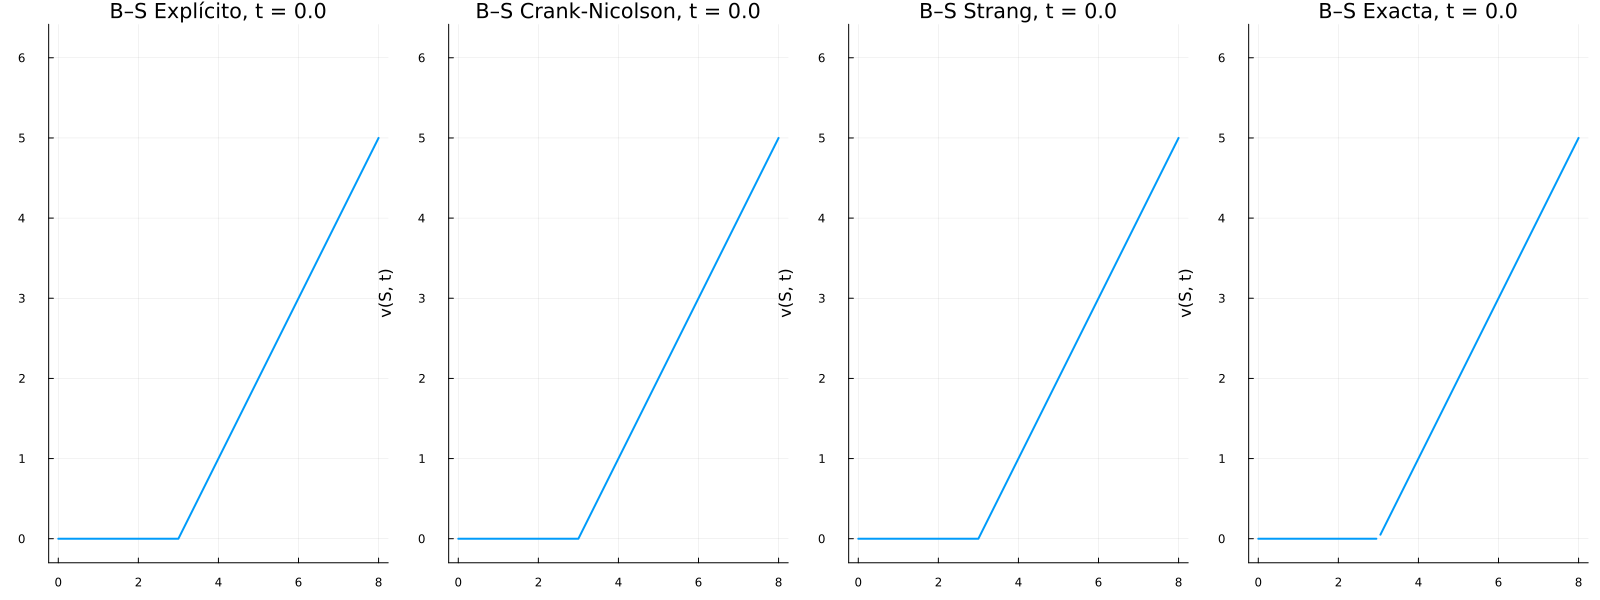

In [15]:
# ANIMACION TEMPORAL
anim = @animate for n in 1:Δt:length(t)
    p1 = plot(s,V[:,n], lw=2, legend=false,
        xlabel = "S", ylabel = "v(S, t)", yaxis=[-0.3,maximum(V)],    
        title="B–S Explícito, t = $(round(t[n], digits=3))", dpi=100)
    p2 = plot(s,V_CN[:,n], lw=2, legend=false,
        xlabel = "S", ylabel = "v(S, t)", yaxis=[-0.3,maximum(V)],    
        title="B–S Crank-Nicolson, t = $(round(t[n], digits=3))", dpi=100)
    p3 = plot(s,V_Strang[:,n], lw=2, legend=false,
        xlabel = "S", ylabel = "v(S, t)", yaxis=[-0.3,maximum(V)],    
        title="B–S Strang, t = $(round(t[n], digits=3))", dpi=100)
    p4 = plot(s,C.(s, 0, t[n], σ, r, K), lw=2, legend=false,
        xlabel = "S", ylabel = "v(S, t)", yaxis=[-0.3,maximum(V)],    
        title="B–S Exacta, t = $(round(t[n], digits=3))", dpi=100)
    plot!(size=(1600,600))
    plot(p1,p2,p3,p4, layout=(1,4))
end
gif(anim,"black-scholes-todas.gif")

Veamos 5 momentos temporales equispaciados en todos los métodos:

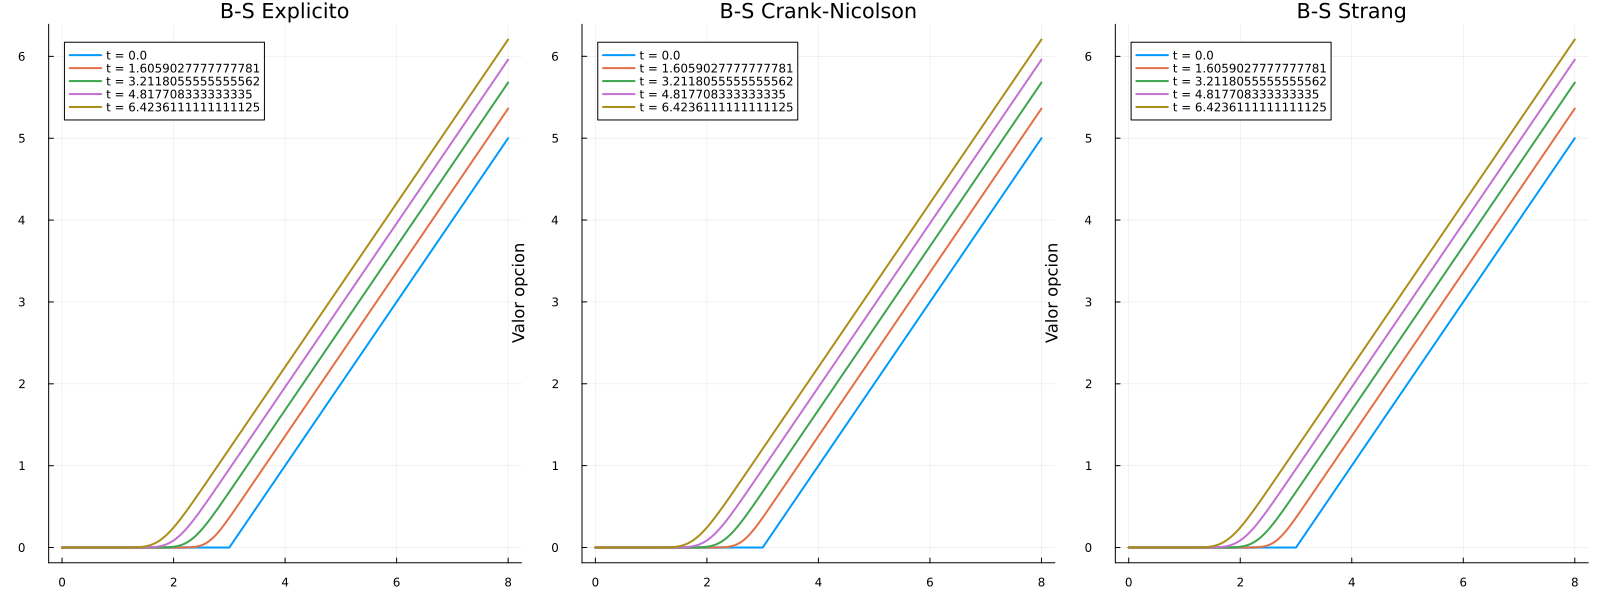

In [16]:
Δt = round(Int, length(t)/5)
idx = 1:Δt:length(t)
label = reshape(["t = $t" for t in t[idx]],1,length(idx))
p1 = plot(s,V[:,idx];label,
    title="B-S Explicito",legend=:topleft,  
    xaxis=("Precio accion"),yaxis=("Valor opcion"), lw=2 )

p2 = plot(s,V_CN[:,idx];label,
    title="B-S Crank-Nicolson",legend=:topleft,  
    xaxis=("Precio accion"),yaxis=("Valor opcion"), lw=2 )

p3 = plot(s,V_Strang[:,idx];label,
    title="B-S Strang",legend=:topleft,  
    xaxis=("Precio accion"),yaxis=("Valor opcion"), lw=2 )



plot!(size=(1600,600))
plot(p1,p2,p3, layout=(1,3))

Vamos a comparar los métodos usando el macro **@time**

In [17]:
@time s, t, V = solve(problema, ExplicitEuler(h, k));

  0.264020 seconds (3.70 M allocations: 61.060 MiB, 11.78% gc time)


In [18]:
@time s, t, V_CN = solve(problema, CrankNicolson(h, k));

  0.113201 seconds (36.80 k allocations: 6.979 MiB, 90.46% compilation time)


In [19]:
@time s, t, V_Strang = solve(problema, Strang(h, k));

  0.619227 seconds (4.48 M allocations: 85.854 MiB, 4.32% gc time, 49.80% compilation time: 87% of which was recompilation)


Comparemos el orden del error respecto de la solución exacta

In [20]:
function norma(v,p, h = nothing) #Para norma infinito no necesitamos h, por eso le damos un valor por defecto
    if p == Inf
        res = abs.(v) |> maximum
    else
        if h == nothing
            error("Tienes que introducir h")
        end
        res = sum(h * abs.(v).^p)^(1/p)
    end
    return res
end


sol_exacta = C.(s, 0, T, σ, r, K);

#A tiempo T, norma Infinito
err_explicito = norma(V[:,end]-sol_exacta, Inf);
err_CN        = norma(V_CN[:,end]-sol_exacta, Inf);
err_Strang    = norma(V_Strang[:,end]-sol_exacta, Inf);

println("Usando norma infinito:")
println("Error Met. Explicito .. $err_explicito")
println("Error Met. C-N ........ $err_CN")
println("Error Met. Strang ..... $err_Strang")

Usando norma infinito:
Error Met. Explicito .. 0.0015780119796182657
Error Met. C-N ........ 0.001185369537598957
Error Met. Strang ..... 0.0014341076557624066
